In [1]:
from ultralytics import YOLO

In [2]:
import cv2
import matplotlib.pyplot as plt
from IPython.display import display, Image

In [3]:
model = YOLO("yolov8n.pt")

In [4]:
import urllib.request

In [5]:
image_url = "https://ultralytics.com/images/zidane.jpg"  # Sample image
image_path = "sample.jpg"
urllib.request.urlretrieve(image_url, image_path)


('sample.jpg', <http.client.HTTPMessage at 0x153c45120>)

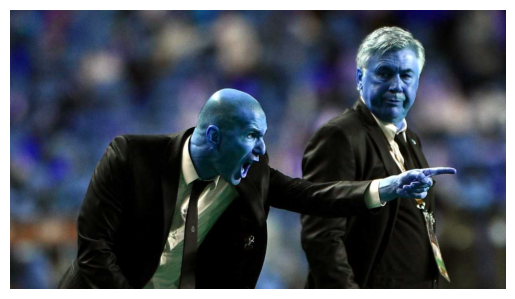

In [6]:
image = cv2.imread(image_path)
plt.imshow(image)  
plt.axis("off")  
plt.show()

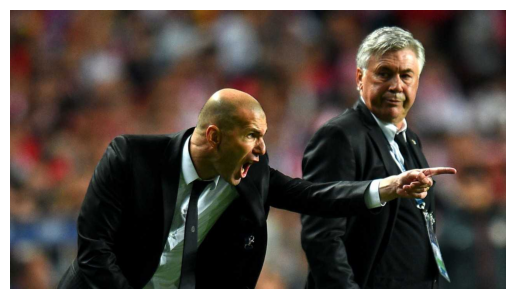

In [7]:
image = cv2.imread(image_path)  # Read the image
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB for correct colors
plt.imshow(image)  
plt.axis("off")  
plt.show()  

In [8]:
results = model(image)


0: 384x640 2 persons, 28.1ms
Speed: 1.6ms preprocess, 28.1ms inference, 0.4ms postprocess per image at shape (1, 3, 384, 640)


In [9]:
results[0].save("output.jpg")

'output.jpg'

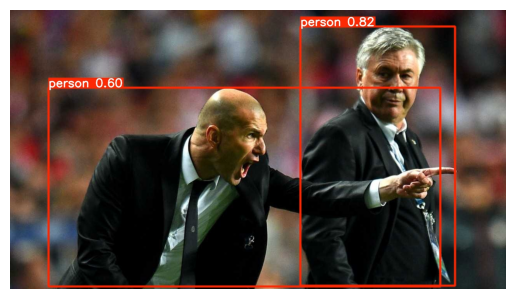

In [10]:
plt.imshow(cv2.imread("output.jpg"))
plt.axis("off")
plt.show()


In [11]:
for result in results:
    boxes = result.boxes.xyxy  # Bounding box coordinates
    classes = result.boxes.cls  # Class labels
    confidences = result.boxes.conf  # Confidence scores
    
    for i in range(len(boxes)):
        print(f"Detected: {model.names[int(classes[i])]} - Confidence: {confidences[i]:.2f}")

Detected: person - Confidence: 0.82
Detected: person - Confidence: 0.60


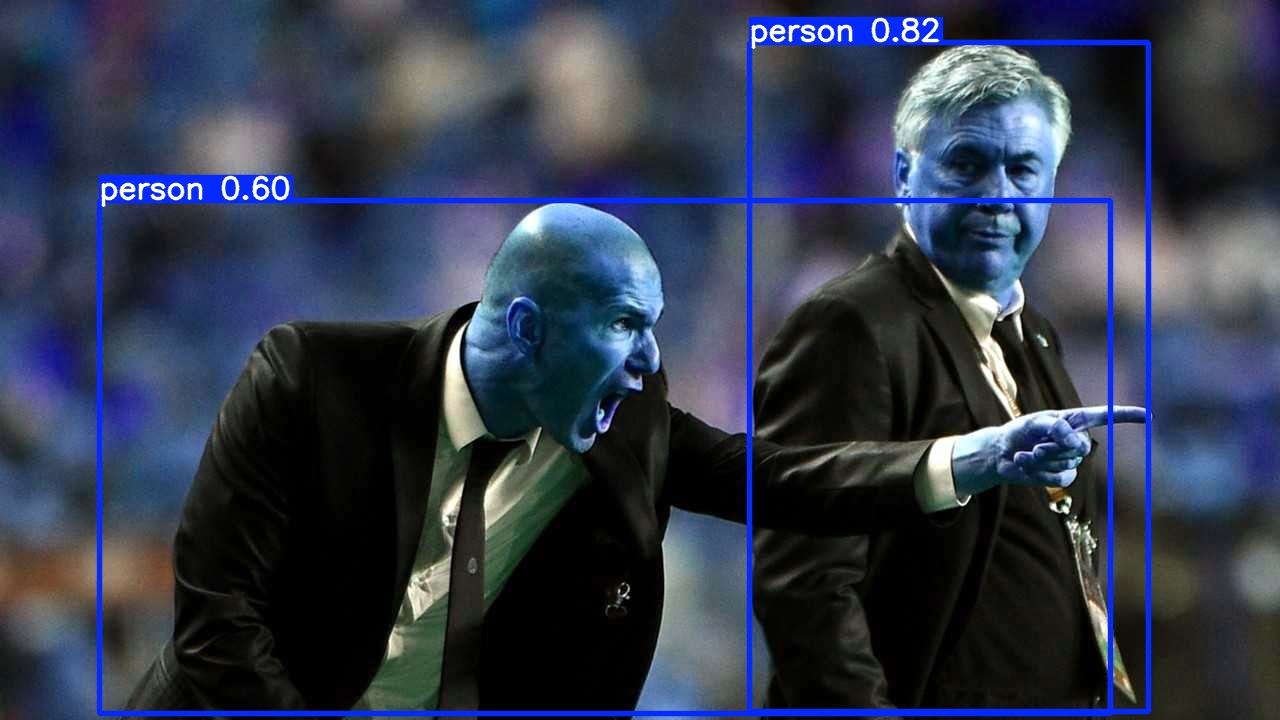

In [12]:
display(Image(filename="output.jpg"))
